In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('./data.csv',usecols=['TIME','GEO','Value'],na_values=":")
df.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


Cho dữ liệu trong sheet Danh sách của file đính kèm. Bạn hãy sử dụng các hàm trong excel để
1. Đếm số ngành đào tạo (Gợi ý: Ngành đào tạo là 2 kí tự đầu của lớp chuyên ngành. Có thể tách một chuỗi bằng hàm LEFT, RIGHT, MID. Sau đó bỏ trùng bằng Revobe Dupplicates)
2. Đếm số lượng sinh viên cho từng khóa (Gợi ý: Khóa là 2 kí tự giữa. Hàm đếm số lượng là CountIF)
3. Đếm số lượng sinh viên toán tin cho từng khóa (Gợi ý: Khoa Toán Tin có lớp chuyên ngành bắt đầu là T)
4. Đếm số lượng sinh viên trong từng khóa và từng ngành, đưa ra bảng như trong sheet Số lượng từng ngành TT. 
5. Vẽ biểu đồ thể hiện số lượng sinh viên toán tin theo các khóa 
6. Đếm số lượng sinh viên từng ngành trong khóa 32 Vẽ biểu đồ thể hiện số lượng sinh viên các ngành của khóa 32 

In [35]:
ls_6 = pd.read_excel('./DSSV_Ex1.xlsx')
ls_6

,Mã SV,Lớp chuyên ngành
0,A19524,SN30g1
1,A20775,TT32e1
2,A24706,QT30d1
3,A24936,TI33c1
4,A25011,QM30e1
...,...,...
11979,A44131,XL34h2
11980,A44134,TT34h2
11981,A44139,NZ34d1
11982,A44139,SD34h1


1. Đếm số ngành đào tạo (Gợi ý: Ngành đào tạo là 2 kí tự đầu của lớp chuyên ngành. Có thể tách một chuỗi bằng hàm LEFT, RIGHT, MID. Sau đó bỏ trùng bằng Revobe Dupplicates)

In [41]:
ls_6_1 = ls_6['Lớp chuyên ngành'].str[:2].unique()
print(len(ls_6_1))
ls_6_1

28


array(['SN', 'TT', 'QT', 'TI', 'QM', 'QF', 'XC', 'AN', 'TA', 'NE', 'NJ',
       'QB', 'QE', 'NK', 'QA', 'NZ', 'XW', 'XV', 'TC', 'XL', 'SD', 'TE',
       'SP', 'TM', 'QH', 'QL', 'QC', 'QI'], dtype=object)

2. Đếm số lượng sinh viên cho từng khóa (Gợi ý: Khóa là 2 kí tự giữa. Hàm đếm số lượng là CountIF)

In [47]:
ls_6['Khoá'] = ls_6['Lớp chuyên ngành'].str[2:4]

In [50]:
ls_6.groupby(['Khoá'])['Mã SV'].count()

Khoá
30    1445
31    1947
32    2389
33    3522
34    2681
Name: Mã SV, dtype: int64

3. Đếm số lượng sinh viên toán tin cho từng khóa (Gợi ý: Khoa Toán Tin có lớp chuyên ngành bắt đầu là T)

In [54]:
ls_6['Nganh'] = ls_6['Lớp chuyên ngành'].str[:1]

In [57]:
ls_6_TT = ls_6[ls_6['Nganh']== 'T']
ls_6_TT

,Mã SV,Lớp chuyên ngành,Khoá,Nganh
1,A20775,TT32e1,32,T
3,A24936,TI33c1,33,T
9,A28267,"TA33c1,",33,T
28,A30117,TI30g1,30,T
39,A30141,TI30h1,30,T
...,...,...,...,...
11902,A44042,TT34h6,34,T
11911,A44050,TE34h2,34,T
11919,A44054,TI34h3,34,T
11980,A44134,TT34h2,34,T


In [59]:
ls_6_TT.groupby(['Khoá'])['Mã SV'].count()

Khoá
30     76
31    138
32    227
33    447
34    443
Name: Mã SV, dtype: int64

4. Đếm số lượng sinh viên trong từng khóa và từng ngành, đưa ra bảng như trong sheet Số lượng từng ngành TT.

In [63]:
ls_6["Nganh Specific"] = ls_6['Lớp chuyên ngành'].str[:2]


In [65]:
ls_6.groupby(['Khoá','Nganh Specific'])['Mã SV'].count()

Khoá  Nganh Specific
30    AN                 13
      NE                157
      NJ                218
      NK                 75
      NZ                 63
                       ... 
34    TT                196
      XC                144
      XL                 90
      XV                 53
      XW                 23
Name: Mã SV, Length: 112, dtype: int64

5. Vẽ biểu đồ thể hiện số lượng sinh viên toán tin theo các khóa

<AxesSubplot:xlabel='Khoá'>

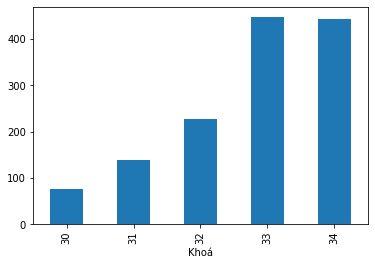

In [67]:
ls_6_TT.groupby(['Khoá'])['Mã SV'].count().plot(kind='bar')

6. Đếm số lượng sinh viên từng ngành trong khóa 32 Vẽ biểu đồ thể hiện số lượng sinh viên các ngành của khóa 32 

In [70]:
ls_6_K_32 = ls_6[ls_6['Khoá'] == '32']


<AxesSubplot:xlabel='Nganh Specific'>

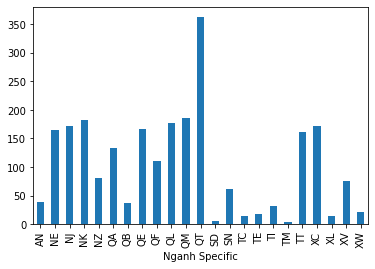

In [73]:
ls_6_K_32.groupby(['Nganh Specific'])['Mã SV'].count().plot(kind='bar')